# **Does the average temperature of the place where we live have an impact on longevity?**

## *About and members:* 👤

Group:
> Igó Ferreira Melo Silva (20220155214)

> Gilherme Barboza de Sousa (20220007418)

> Davi Nasiasene Amorim (20220056987)

This is a notebook created as a project for Introduction to Data Science subject, in which we will explore a dataset that contains several informations about Brazilian municipalities.

Through the analysis made it, will be possible to answer three questions:

+ Which line of business has the most impact on a city's GDP?

+ Does the average temperature where we live impact longevity?

+ Which parallel would divide Brazil so that half of the population would be in the north and the other half in the south?

## *The Dataset:* 🌏

### **Dataset Link**

https://www.kaggle.com/datasets/crisparada/brazilian-cities?select=BRAZIL_CITIES.csv

### **Context**

This dataset is a compilation of several publicly available information about Brazilian Municipalities.

## What is IDHM Longevity?

The IDHM Longevity (IDHM-L) is one of the three components of the **Municipal Human Development Index (IDHM)**, which is a composite measure of indicators of three dimensions of human development: longevity, education and income.
The longevity component is measured by life expectancy at birth, calculated by an indirect method from data from the Demographic Censuses of IBGE.
This indicator shows the average number of years that people would live from birth, maintaining the same mortality patterns observed in the reference year.
As a maximum longevity parameter, 85 years is used, while 25 years is considered the minimum parameter. Therefore, if the municipality in question has a life expectancy at birth of 70 years, its IDHM-L will be calculated as follows:

(70 - 25) / (85 - 25) => 45 / 60 => IDHM-L = 0.750.

Hence, the municipality's IDHM-L will be 0.750.

## Importing the Dataset and Libraries: 📖

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns

In [2]:
# loading data
url = 'https://raw.githubusercontent.com/IgoSilvaUFPB/projeto_ICD/main/BRAZIL_CITIES.csv'
df = pd.read_csv(url, sep = ';')
df

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,COMP_R,COMP_S,COMP_T,COMP_U,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,POST_OFFICES
0,Alvorada,RS,0,195673,195483,190,60221,60221,0,194483,...,32,117,0,0,58183,17062,71,0,0,1
1,Montenegro,RS,0,59415,59332,83,19953,18142,1811,49775,...,67,126,0,0,26888,10365,114,0,0,1
2,São Gabriel,RS,0,60425,60356,69,20169,17851,2318,53292,...,36,94,0,0,18038,6849,17,0,0,1
3,Candeias,BA,0,83158,83158,0,24971,22901,2070,67850,...,4,40,0,0,11322,7260,4,0,0,1
4,Itaparica,BA,0,20725,20685,40,6364,6364,0,19132,...,2,9,0,0,1491,985,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Marajá Do Sena,MA,0,8051,8051,0,1759,260,1499,1158,...,0,0,0,0,11,634,0,0,0,0
5556,São Valério,TO,0,4383,4383,0,1347,806,541,2718,...,0,1,0,0,0,0,0,0,0,0
5557,Januário Cicco,RN,0,9011,9011,0,2469,936,1533,3365,...,1,1,0,0,0,0,0,0,0,0
5558,São Domingos,PB,0,2855,2855,0,829,302,527,980,...,0,12,0,0,0,0,0,0,0,0


In [3]:
# selecting columns
df_longevity = df[["CITY","STATE","LAT","IDHM_Longevidade"]]
df_longevity

,CITY,STATE,LAT,IDHM_Longevidade
0,Alvorada,RS,-2.999.749.306,0.874
1,Montenegro,RS,-2.968.811.861,0.866
2,São Gabriel,RS,-3.033.676.005,0.822
3,Candeias,BA,-1.267.192.271,0.823
4,Itaparica,BA,-1.288.148.905,0.826
...,...,...,...,...
5555,Marajá Do Sena,MA,-4.620.313.324,0.774
5556,São Valério,TO,-1.197.306.746,0.814
5557,Januário Cicco,RN,-6.156.098.023,0.771
5558,São Domingos,PB,-6.815.924.981,0.754


In [4]:
# converting latitude to numeric
df_longevity["LAT"] = df_longevity["LAT"].str.replace('.', '', regex=True)
df_longevity.loc[df_longevity["LAT"].str[0].isin(['0', '1', '2', '3', '4', '5']), "LAT"] = df_longevity["LAT"].str[:1] + '.' + df_longevity["LAT"].str[1:]
df_longevity.loc[df_longevity["LAT"].str[0].isin(['-']) & df_longevity["LAT"].str[1].isin(['1', '2', '3']) & df_longevity["STATE"].isin(['RS', 'BA', 'MT', 'GO', 'DF', 'MS', 'MG', 'ES', 'RJ', 'SP', 'SC', 'PR']), "LAT"] = df_longevity["LAT"].str[:3] + '.' + df_longevity["LAT"].str[3:]
df_longevity.loc[df_longevity["LAT"].str[0].isin(['-']) & df_longevity["LAT"].str[1].isin(['4', '5', '6', '7', '8', '9']) & df_longevity["STATE"].isin(['RS', 'BA', 'MT', 'GO', 'DF', 'MS', 'MG', 'ES', 'RJ', 'SP', 'SC', 'PR']), "LAT"] = df_longevity["LAT"].str[:2] + '.' + df_longevity["LAT"].str[2:]
df_longevity.loc[df_longevity["LAT"].str[0].isin(['-']) & df_longevity["STATE"].isin(['RR', 'AP', 'AM', 'AC', 'RO', 'TO', 'MA', 'PA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']), "LAT"] = df_longevity["LAT"].str[:2] + '.' + df_longevity["LAT"].str[2:]
df_longevity["LAT"] = pd.to_numeric(df_longevity["LAT"])
df_longevity["LAT"]


C:\Users\igofe\AppData\Local\Temp\ipykernel_13656\2620494397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_longevity["LAT"] = df_longevity["LAT"].str.replace('.', '', regex=True)
C:\Users\igofe\AppData\Local\Temp\ipykernel_13656\2620494397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_longevity["LAT"] = pd.to_numeric(df_longevity["LAT"])


0      -29.997493
1      -29.688119
2      -30.336760
3      -12.671923
4      -12.881489
          ...    
5555    -4.620313
5556    -1.197307
5557    -6.156098
5558    -6.815925
5559    -5.858114
Name: LAT, Length: 5560, dtype: float64

In [5]:
# checking columns data types
df_longevity.dtypes

CITY                 object
STATE                object
LAT                 float64
IDHM_Longevidade    float64
dtype: object

## Defining latitude intervals

### Given that latitude significantly impacts the average temperature of a location, let's compare the longevity indices of three sectors located in distinct regions from north to south. By doing so, we might verify the influence of average temperature on life expectancy.

In [6]:
# calculating the range of the latitude
max_lat = df_longevity["LAT"].max()
min_lat = df_longevity["LAT"].min()
range_lat = max_lat - min_lat
sector_lat = range_lat/3
sector_lat

12.72094207

In [7]:
# Northest cities
north_cities_lat = max_lat - sector_lat
north_cities_lat

-8.245682729999999

In [8]:
# Southeast cities
southeast_cities_lat = min_lat + sector_lat
southeast_cities_lat

-20.966624799999998

In [9]:
# selecting the cities between max_lat and north_cities_lat
northest_cities = df_longevity.loc[(df_longevity["LAT"] <= max_lat) & (df_longevity["LAT"] > north_cities_lat)]
northest_cities

,CITY,STATE,LAT,IDHM_Longevidade
17,Santa Cruz Do Capibaribe,PE,-7.955190,0.806
38,Camaragibe,PE,-8.020522,0.805
75,São José De Ribamar,MA,-2.555859,0.790
86,Abreu E Lima,PE,-7.904449,0.791
87,Picos,PI,-7.081374,0.800
...,...,...,...,...
5555,Marajá Do Sena,MA,-4.620313,0.774
5556,São Valério,TO,-1.197307,0.814
5557,Januário Cicco,RN,-6.156098,0.771
5558,São Domingos,PB,-6.815925,0.754


In [10]:
# selecting the cities between north_cities_lat and southeast_cities_lat
between_cities = df_longevity.loc[(df_longevity["LAT"] <= north_cities_lat) & (df_longevity["LAT"] > southeast_cities_lat)]
between_cities

,CITY,STATE,LAT,IDHM_Longevidade
3,Candeias,BA,-12.671923,0.823
4,Itaparica,BA,-12.881489,0.826
15,Paulo Afonso,BA,-9.403332,0.789
16,Santo Antônio De Jesus,BA,-12.968008,0.815
20,Ibirité,MG,-20.028038,0.840
...,...,...,...,...
5468,Vera Cruz,BA,-12.935733,0.817
5489,Feira Grande,AL,-9.900437,0.736
5492,Jatobá,PE,-9.185070,0.775
5495,Santa Luzia Do Norte,AL,-9.596768,0.770


In [11]:
# selecting the cities between southeast_cities_lat and min_lat
southeast_cities = df_longevity.loc[(df_longevity["LAT"] >= min_lat) & (df_longevity["LAT"] < southeast_cities_lat)]
southeast_cities

,CITY,STATE,LAT,IDHM_Longevidade
0,Alvorada,RS,-29.997493,0.874
1,Montenegro,RS,-29.688119,0.866
2,São Gabriel,RS,-30.336760,0.822
5,Guaíba,RS,-30.108602,0.833
6,Esteio,RS,-29.852186,0.843
...,...,...,...,...
5463,Itatiaia,RJ,-22.497015,0.836
5464,Planalto,RS,-27.331464,0.807
5471,Gália,SP,-22.294019,0.823
5486,Bocaina Do Sul,SC,-27.743198,0.768


## Calculating the average IDHM-L on each latitude interval

In [12]:
# calculating the average of the IDHM_Longevidade of the northest cities
mean_longevity_north_sector = northest_cities["IDHM_Longevidade"].mean()
# calculating the average of the IDHM_Longevidade of the between cities
mean_longevity_between_sector = between_cities["IDHM_Longevidade"].mean()
# calculating the average of the IDHM_Longevidade of the southeast cities
mean_longevity_south_sector = southeast_cities["IDHM_Longevidade"].mean()
print("The average of the IDHM_Longevidade of the northest cities, between cities and southeast cities are, respectively: {:.2f}, {:.2f} and {:.2f}.".format(mean_longevity_north_sector, mean_longevity_between_sector, mean_longevity_south_sector))

The average of the IDHM_Longevidade of the northest cities, between cities and southeast cities are, respectively: 0.76, 0.80 and 0.83.


<AxesSubplot:>

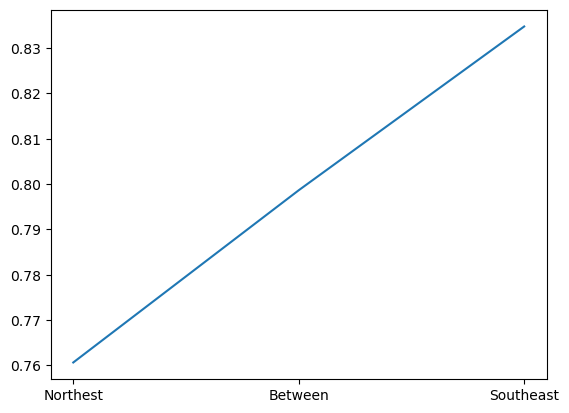

In [13]:
# line plotting mean IDHM_Longevidade by sector
sns.lineplot(x = ["Northest", "Between", "Southeast"], y = [mean_longevity_north_sector, mean_longevity_between_sector, mean_longevity_south_sector])


### The aforementioned plot clearly indicates a noteworthy trend in life expectancy as we move towards the southern regions. This trend could potentially be attributed to the average temperature, but it is important to consider other influential factors such as socio-economic conditions, access to healthcare, and the quality of healthcare services, among various other factors.